In [2]:
# Tensorflow
# 다른 package, module에 비해서 살짝 특이한 형태의 library
# Tensorflow는 3가지 구성요소로 이해하면 쉬워요!
# 1. Node : 수학적인 연산을 담당, 데이터의 입출력을 담당
# 2. edge : 동적 데이터를 node로 실어 나르는 역할을 담당
# 3. Tensor : 다차원 배열 형태의 동적 데이터
# (어떤 점이 다른 library랑 가장 크게 다른 특징이라구..?)


import tensorflow as tf

node1 = tf.constant("Hello World!")

## graph를 실행시키기 위해서는 runner가 필요
## session이라고 불리는 runner를 생성해요!
sess = tf.Session()
sess.run(node1)
print(sess.run(node1))
# b'Hello World!' : 앞의 b는 바이트 스트링이라는 의미
print(sess.run(node1).decode())


b'Hello World!'
Hello World!


In [3]:
# 2개의 값을 더하는  tensorflow graph를 생성하고 실행시켜서 값을 구해보아요!
import tensorflow as tf
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1 + node2

sess = tf.Session()
print(sess.run([node1,node3]))


[10.0, 30.0]


In [27]:
# 실행시키는 시점에 이미 각 노드의 값이 결정되어 있어요
# constant(상수이기 떄문에)
# 만약 실행시키는 시점에 각 노드의 값을 결정해서 실행시키려면 어떻게 해야할까요?(값을 고정X)
import tensorflow as tf

node1 = tf.placeholder(dtype=tf.float32)
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1 + node2

sess = tf.Session()

result = sess.run(node3,
                  feed_dict={node1 : input(),
                             node2 : input()})

print("덧셈결과 : {}".format(result))

# Tensorflow는 수학적 연산을 위한 그래프
# 문자형 데이터는 거의 활용되지 않고 숫자형 데이터가 활용된다


20
30
덧셈결과 : 50.0


In [18]:
# linear 
## 구현해 보아요!

# 1. 필요한 module을 import
import tensorflow as tf

# 2. trainiing data set 지정
x_data = [1,2,3]
y_data = [3,5,7]

# 3. placeholder( Tensorflow그래프에 입력을 주기위한 파라미터 역할 )
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 4. Weight, bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 5. 가설(Hypothesis)
H = W * x + b

# 6. Cost Function(Loss function)
# 가설에서 y 값을 빼고 그 값을 제곱해서 평균을 구해요!
cost = tf.reduce_mean(tf.square(H-y))

# 7. track node를 생성
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01) # 공식이다!
# 경사조정하는 기능
train = optimizer.minimize(cost)
# 트레인은 접선의 기울기가 가장 작을 때의 cost값

# 8. 그래프를 실행시키기 위해서 runner(session)
# 그리고 Variable릏 사용하면 학습하기 전에 반드시 초기화를 해야해요

sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 초기화

# 9. learning작업(학습)
for step in range(3000):
    _, w_val, cost_val, b_val = sess.run([train,W,cost,b],
                                         # _ : train으로부터 얻은 값은 사용하지 않겠다
                                         # W와 b는 값 알아내기 위해 실행시키는 것
                                       feed_dict={
                                           x : x_data,
                                           y : y_data
                                       })
    if step % 300 ==0:
        print("w값 : {},b값 : {}, cost값 : {}".format(w_val,
                                                   b_val,
                                                   cost_val))

# 학습이 끝났어요! => 최적의 W와 b값을 찾아내서 H를 만들었어요
# prediction
print(sess.run(H, feed_dict = {x: 200}))

w값 : [0.2700814],b값 : [0.7953741], cost값 : 19.50411033630371
w값 : [1.9003886],b값 : [1.2264401], cost값 : 0.007391196209937334
w값 : [1.9516132],b값 : [1.1099946], cost값 : 0.001744021545164287
w값 : [1.976496],b값 : [1.05343], cost값 : 0.0004115091578569263
w값 : [1.9885828],b값 : [1.0259538], cost값 : 9.71001572906971e-05
w값 : [1.994454],b값 : [1.0126071], cost값 : 2.2910193365532905e-05
w값 : [1.9973059],b값 : [1.0061241], cost값 : 5.406429409049451e-06
w값 : [1.9986911],b값 : [1.0029756], cost값 : 1.276287889595551e-06
w값 : [1.9993634],b값 : [1.0014468], cost값 : 3.0180899557308294e-07
w값 : [1.9996899],b값 : [1.0007044], cost값 : 7.148977232418474e-08
[400.96988]


     Ozone  Temp
0     41.0    67
1     36.0    72
2     12.0    74
3     18.0    62
4      NaN    56
..     ...   ...
148   30.0    70
149    NaN    77
150   14.0    75
151   18.0    76
152   20.0    68

[153 rows x 2 columns]


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


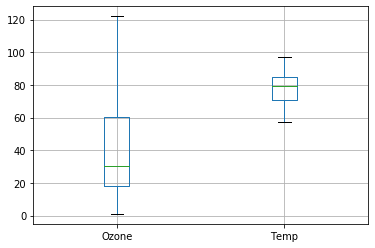

In [37]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/ozone.csv")

ozone_df = pd.DataFrame(df,
                       columns=["Ozone","Temp"])

print(ozone_df)
new_ozone = ozone_df.dropna(how="any", inplace =False)

display(new_ozone)
# new_ozone.boxplot()

answer_df = new_ozone.loc[new_ozone['Ozone'] < 125.0,['Ozone','Temp']]

display(answer_df)
answer_df.boxplot()

In [40]:
## 온도에 따른 Ozone 데이터를 학습한 후 Prediction까지 진행
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
# data loading
# 학습데이터를 확보해서 전처리 과정을 거쳐야해요!
df = pd.read_csv("./data/ozone.csv")
df.head()
print("읽어들인 데이터의 shape : {}".format(df.shape))

# 결측치 제거 시 다른 column에 의해서 너무 많은 행이 제거되는걸 방지하기 위해
# 필요한 column만 추출
df = df[["Ozone","Temp"]]
display(df)

# 결측치를 제거(dropna()이용)
# 결측치를 찾아서 지우고 그 지운 data frame을 리턴
df = df.dropna(how="any",inplace=False)
print("결측치를 제거한 후 남은 데이터 : {}".format(df.shape))
    
# 여기까지, 데이터 읽어들여서 결측치 처리 작업 완료

읽어들인 데이터의 shape : (153, 6)


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56
...,...,...
148,30.0,70
149,NaN,77
150,14.0,75
151,18.0,76


결측치를 제거한 후 남은 데이터 : (116, 2)


In [100]:
# 이번에는 이상치를 찾아서 제거해보아요!
# 각 column에(온도와 오존) 대해서 boxplot그려보아요
# plt.boxplot(df["Temp"]) # 온도는 이상치가 존재하지 않아요
# plt.boxplot(df["Ozone"]) # 오존에는 이상치가 존재해요

# 이상치를 찾기 위해서 Tukey Fence방식을 이용(IQR 방식 이용)
# IQR 값은 3사분위 값 - 1사분위 값을 계산해서 구한다!
# 만약 (3사분위 값 + IQR * 1.5)을 초과하는 값이 존재하면 이상치
# 만약 (1사분위 값 - IQR * 1.5) 미만의 값이 존재하면 이상치

q1,q3 = np.percentile(df["Ozone"],[25,75])

iqr = q3 - q1
upper = q3 + iqr * 1.5
mask = df["Ozone"] > upper   # mask
df = df.loc[~mask]                # ~ : not의 의미
print("이상치를 제거한 후 남은 데이터 : {}".format(df.shape))
# print(upper)


이상치를 제거한 후 남은 데이터 : (114, 2)


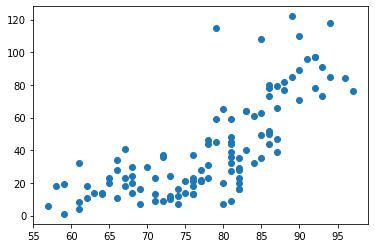

In [77]:
# linear regression을 하기 전에 데이터의 경향성을 확인
# 산점도(scatter)를 이용해서 데이터의 경향성을 확인해보아요!
plt.scatter(df["Temp"],df["Ozone"])

In [134]:
# linear regression
# 1. training data set 준비
x_data = df["Temp"]
y_data = df["Ozone"]

# 2. 입력을 받아들이는 node인 placeholder를 정의
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 3. Weight, bias를 정의
W = tf.Variable(tf.random_normal([1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

# 4. 가설(H) 정의
H = W * x + b

# 5. 비용함수(Cost Function) 정의
cost = tf.reduce_mean(tf.square(H-y))

# 6. train (optimize 최소의 cost값을 찾아내는 과정(=>미분))
optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.0000001)
train = optimizer.minimize(cost)

# 7. session, 초기화 작업 (학습할 준비 완료. session필요!)
sess = tf.Session() # 그래프를 실행시키기 위해 필요!
sess.run(tf.global_variables_initializer())

# 8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],
                           feed_dict = {x: x_data,
                                        y: y_data})
    if step % 300 == 0:
        print("cost 값은 : {}".format(cost_val))



cost 값은 : 4506.60400390625
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan


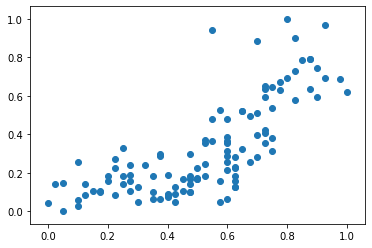

In [114]:
# 정제된 데이터를 정규화나 표준화를 이용해서 값의 범위를 조절해야 해요!
# => 그래야 학습이 정상적으로 이뤄질 수 있어요!
# 데이터를 표준화 방식으로 다시 만들어서 학습을 진행
# Normalization(표준화)
# 각 데이터를 다음과 같은 방식으로 비율적으로 축소시키는 방식
# 각 요소의 값 => (요소값 - 전체데이터의 최소값)/
#                (전체데이터의 최대값 - 전체데이터의 최소값)

df["Temp_Norm"]=(df["Temp"] - df["Temp"].min()) /(df["Temp"].max() - df["Temp"].min())
df["Ozone_Norm"]=(df["Ozone"] - df["Ozone"].min()) /(df["Ozone"].max() - df["Ozone"].min())
# 확인작업
# plt.scatter(df["Temp"],df["Ozone"])
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])
# (단위만 줄어들었을 뿐 산점도 모습은 동일하다!!!)



In [143]:
# linear regression
# 1. training data set 준비
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]

# 2. 입력을 받아들이는 node인 placeholder를 정의
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 3. Weight, bias를 정의
W = tf.Variable(tf.random_normal([1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

# 4. 가설(H) 정의
H = W * x + b

# 5. 비용함수(Cost Function) 정의
cost = tf.reduce_mean(tf.square(H-y))

# 6. train (optimize 최소의 cost값을 찾아내는 과정(=>미분))
optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

# 7. session, 초기화 작업 (학습할 준비 완료. session필요!)
sess = tf.Session() # 그래프를 실행시키기 위해 필요!
sess.run(tf.global_variables_initializer())

# 8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],
                           feed_dict = {x: x_data,
                                        y: y_data})
    if step % 300 == 0:
        print("cost 값은 : {}".format(cost_val))



cost 값은 : 1.321845293045044
cost 값은 : 0.02945268154144287
cost 값은 : 0.02809273451566696
cost 값은 : 0.027291199192404747
cost 값은 : 0.026818716898560524
cost 값은 : 0.026540206745266914
cost 값은 : 0.02637602388858795
cost 값은 : 0.02627924270927906
cost 값은 : 0.026222193613648415
cost 값은 : 0.0261885654181242


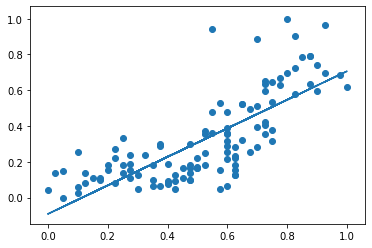

In [145]:
# 학습이 종료된 후 최종적으로 얻은 W와 b의 값을 이용하여
# line graph를 산점도와 함께 그려보아요!
plt.scatter(df["Temp_Norm"], df["Ozone_Norm"])
plt.plot(df["Temp_Norm"], df["Temp_Norm"] * sess.run(W) + sess.run(b))

In [168]:
# 학습이 끝났으니.. Prediction을 해보아요!
# 화씨 62도에서 오존량을 예측해 보아요
tmp = (81 - df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
result_norm = sess.run(H,feed_dict={x:tmp})
print(result_norm)
result = result_norm * (df["Ozone"].max()-df["Ozone"].min()) + df["Ozone"].min()
print(result)

[0.38752776]
[47.890858]


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56
...,...,...
148,30.0,70
149,NaN,77
150,14.0,75
151,18.0,76


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x2973fd9e828>,
 'caps': [<matplotlib.lines.Line2D at 0x2973fd9ef28>,
 'boxes': [<matplotlib.lines.Line2D at 0x2973fd9e470>],
 'medians': [<matplotlib.lines.Line2D at 0x2973fd885f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2973fd88940>],
 'means': []}

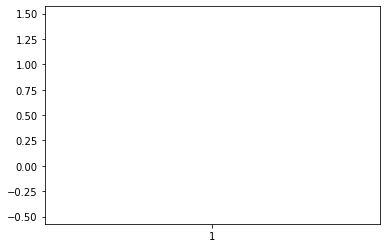